In [1]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

# Load the train test photos

In [14]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder = 'train_data/train'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_train +=len(files)
    
folder = 'train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_validation +=len(files)

print(files_train, files_validation)

432 164


In [15]:
img_width, img_height = 48,48
train_data_dir = 'train_data/train'
validation_data_dir = 'train_data/test'
number_train_sample = files_train
number_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

In [16]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [17]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [18]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
for layer in model.layers[:10]:
    layer.traiable = False

This code snippet is used to freeze the first 10 layers of a neural network model, preventing them from being updated during training. It is commonly applied in transfer learning to retain useful pre-trained features and can also help reduce overfitting and speed up training.

In [22]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = 'categorical_crossentropy', 
                    optimizer = optimizers.SGD(learning_rate = 0.0001, momentum=0.9), 
                    metrics=['accuracy'])

# Data Augmentation

Data augmentation is a technique used in machine learning and deep learning to increase the diversity and size of a training dataset without actually collecting new data. It involves generating new data samples from the existing dataset by applying various transformations, such as rotation, flipping, scaling, cropping, or color adjustments, to create different variations of the original data.

### Data Augmentation Techniques Applied

**Rescaling (`rescale=1.0/255`):**  
Rescales pixel values from the range [0, 255] to [0, 1] by dividing all pixel values by 255. This normalization step is a common practice in deep learning to help models converge faster and improve numerical stability.

**Horizontal Flip (`horizontal_flip=True`):**  
Randomly flips the images horizontally. This augmentation technique helps the model become invariant to the horizontal orientation of objects. For example, an image of a cat flipped horizontally is still a valid training sample of a cat.

**Zooming (`zoom_range=0.1`):**  
Randomly zooms in or out on images within a range of 10%. This technique simulates different scales of objects and helps the model learn to recognize objects regardless of their size.

**Width Shift (`width_shift_range=0.1`):**  
Randomly shifts the images horizontally (left or right) by 10% of the total width. This transformation helps the model learn to identify objects that may not be centered in the image.

**Height Shift (`height_shift_range=0.1`):**  
Randomly shifts the images vertically (up or down) by 10% of the total height. Similar to width shifting, this augmentation helps in recognizing objects that may be located at different vertical positions within the frame.

**Rotation (`rotation_range=5`):**  
Randomly rotates the images by up to 5 degrees. This helps the model become invariant to minor rotations, enhancing its ability to recognize rotated objects.

**Fill Mode (`fill_mode='nearest'`):**  
Specifies how to fill in new pixels that are introduced as a result of the transformations (such as shifting or rotating). The nearest mode fills the new pixels with the nearest pixel value from the image, maintaining a seamless visual consistency after transformations.

In [23]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [ ]:
predictions = model_final.fit(
train_generator, steps_per_epoch=number_train_sample//batch_size, 
    validation_steps=number_validation_sample//batch_size, 
epochs = epochs, validation_data=validation_generator)

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 838ms/step - accuracy: 0.9820 - loss: 0.0537 - val_accuracy: 0.9312 - val_loss: 0.1870
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9688 - loss: 0.0514 - val_accuracy: 1.0000 - val_loss: 0.1091
Epoch 3/15


C:\Users\lebro\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 842ms/step - accuracy: 0.9812 - loss: 0.0482 - val_accuracy: 0.9438 - val_loss: 0.1353
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0241 - val_accuracy: 0.7500 - val_loss: 0.4944
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 815ms/step - accuracy: 0.9931 - loss: 0.0459 - val_accuracy: 0.9187 - val_loss: 0.1498
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0235 - val_accuracy: 0.7500 - val_loss: 1.0948
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 842ms/step - accuracy: 0.9817 - loss: 0.0529 - val_accuracy: 0.9000 - val_loss: 0.1803
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 9/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 830ms/step - accuracy: 0.9924 - loss: 0.0353 - val_accuracy: 0.9438 - val_loss: 0.1559
Epoch 10/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - val_los

In [27]:
predictions.history

{'accuracy': [0.5697115659713745,
  0.75,
  0.8675000071525574,
  1.0,
  0.9524999856948853,
  0.9375,
  0.9649999737739563,
  1.0,
  0.9700000286102295,
  0.96875,
  0.9624999761581421,
  0.96875,
  0.9674999713897705,
  1.0,
  0.9775000214576721],
 'loss': [0.6625804305076599,
  0.4008024334907532,
  0.29463183879852295,
  0.25222688913345337,
  0.20318691432476044,
  0.17796698212623596,
  0.137989342212677,
  0.08817876875400543,
  0.11973793059587479,
  0.13252241909503937,
  0.10129295289516449,
  0.06656493246555328,
  0.0849645808339119,
  0.027687331661581993,
  0.06390149891376495],
 'val_accuracy': [0.768750011920929,
  0.75,
  0.887499988079071,
  1.0,
  0.887499988079071,
  1.0,
  0.918749988079071,
  1.0,
  0.90625,
  1.0,
  0.9125000238418579,
  1.0,
  0.925000011920929,
  1.0,
  0.925000011920929],
 'val_loss': [0.45194482803344727,
  0.42825305461883545,
  0.29264238476753235,
  0.14151377975940704,
  0.2588193714618683,
  0.0773070827126503,
  0.23127619922161102,
  0

# Visualizing Accuracy and Loss

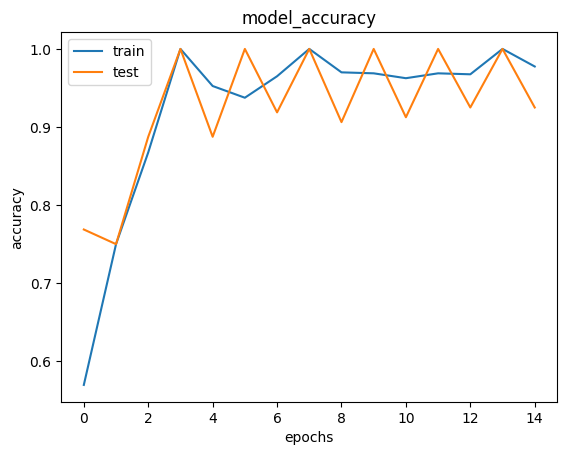

In [28]:
import matplotlib.pyplot as plt
plt.plot(predictions.history['accuracy'])
plt.plot(predictions.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

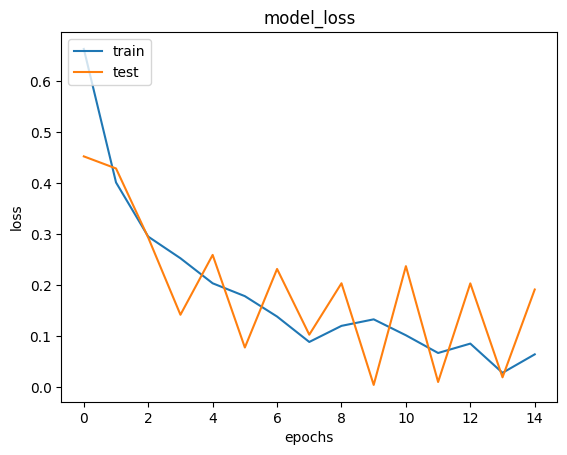

In [29]:
import matplotlib.pyplot as plt
plt.plot(predictions.history['loss'])
plt.plot(predictions.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# Let's make some predictions

In [30]:
class_dictionary = {}
class_dictionary[0]  = 'No Car'
class_dictionary[1]  = 'Car'

In [31]:
class_dictionary

{0: 'No Car', 1: 'Car'}

In [32]:
import cv2
import numpy as np

def make_prediction(image):
    image = cv2.imread(image)
    image = cv2.resize(image, (48, 48))
    img = image/255
#     (1, 48, 48, 3) -> 4D Tensor
    img = np.expand_dims(img, axis = 0)
    
    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [33]:
make_prediction("roi_1.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


'Car'

In [34]:
make_prediction("spot4.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


'Car'

In [36]:
make_prediction("spot216.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


'No Car'

# Save the model

In [37]:
model_final.save("model_final.h5")